In [1]:
%matplotlib notebook

In [2]:
from temmeta import data_io as dio

In [4]:
input_path = "data/sample_data.emd"
f = dio.EMDFile(input_path)
f.print_simple_structure()

------------------------------
        Image datasets        
------------------------------
Dataset number: 0, UUID: 07a19a7f6e4248178f4cf2ab41c0bb07, Shape: 128x128, Frames: 508, Data type: uint16, Min:0, Max:65535
Dataset number: 1, UUID: 0c0461646f024a1da0e617e8c194d6e1, Shape: 128x128, Frames: 508, Data type: uint16, Min:0, Max:65535
Dataset number: 2, UUID: 66f30a32f24746afa7541a7b191dedcd, Shape: 128x128, Frames: 508, Data type: uint16, Min:15925, Max:65107
Dataset number: 3, UUID: 70c607e5866649bdbc400ddf0fbadc4f, Shape: 128x128, Frames: 1, Data type: float32, Min:0.0, Max:6.0
Dataset number: 4, UUID: 7b99cbc88f414105ba2f5d03e5283341, Shape: 128x128, Frames: 508, Data type: uint16, Min:0, Max:65535
Dataset number: 5, UUID: e81589578cca4839b79b2e1ca9fcc870, Shape: 128x128, Frames: 1, Data type: float32, Min:0.0, Max:9.0
---------------------------------------
        SpectrumStream datasets        
---------------------------------------
Dataset number: 0, UUID: 2121b3a23f784c12

In [5]:
import os

In [6]:
os.path.abspath(input_path)

'/home/din14970/programs/NRR-emd/data/sample_data.emd'

<IPython.core.display.Javascript object>


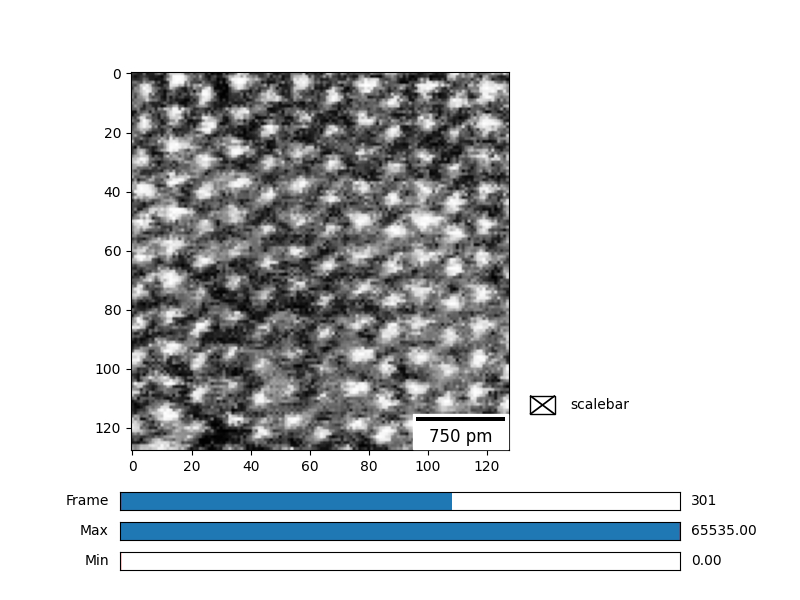

In [7]:
f.get_dataset("Image", "07a19a7f6e4248178f4cf2ab41c0bb07").plot_interactive()

In [8]:
from jnrr import io_tools

In [9]:
from jnrr import processing

In [13]:
from importlib import reload
reload(io_tools)
reload(processing)

<module 'jnrr.processing' from '/Users/nielscautaerts/Documents/PythonProjects/NRR-emd/jnrr/processing.py'>

In [11]:
paths = io_tools.extract_emd(input_path)

Dataset 07a19a7f6e4248178f4cf2ab41c0bb07 was exported to /home/din14970/programs/NRR-emd/data/images_000. A config file /home/din14970/programs/NRR-emd/data/matchSeries_000.par was created.
Dataset 0c0461646f024a1da0e617e8c194d6e1 was exported to /home/din14970/programs/NRR-emd/data/images_001. A config file /home/din14970/programs/NRR-emd/data/matchSeries_001.par was created.
Dataset 66f30a32f24746afa7541a7b191dedcd was exported to /home/din14970/programs/NRR-emd/data/images_002. A config file /home/din14970/programs/NRR-emd/data/matchSeries_002.par was created.


Dataset 7b99cbc88f414105ba2f5d03e5283341 was exported to /home/din14970/programs/NRR-emd/data/images_004. A config file /home/din14970/programs/NRR-emd/data/matchSeries_004.par was created.


In [12]:
paths

{'image_folder_paths': ['/home/din14970/programs/NRR-emd/data/images_000',
  '/home/din14970/programs/NRR-emd/data/images_001',
  '/home/din14970/programs/NRR-emd/data/images_002',
  '/home/din14970/programs/NRR-emd/data/images_004'],
 'output_folder_paths': ['/home/din14970/programs/NRR-emd/data/nonrigid_results_000',
  '/home/din14970/programs/NRR-emd/data/nonrigid_results_001',
  '/home/din14970/programs/NRR-emd/data/nonrigid_results_002',
  '/home/din14970/programs/NRR-emd/data/nonrigid_results_004'],
 'spectrum_folder_paths': ['/home/din14970/programs/NRR-emd/data/spectra_000'],
 'config_file_paths': ['/home/din14970/programs/NRR-emd/data/matchSeries_000.par',
  '/home/din14970/programs/NRR-emd/data/matchSeries_001.par',
  '/home/din14970/programs/NRR-emd/data/matchSeries_002.par',
  '/home/din14970/programs/NRR-emd/data/matchSeries_004.par']}

In [18]:
selected_config = paths["config_file_paths"][2]
conf = io_tools.read_config_file(selected_config)
conf

{'templateNamePattern': '/home/din14970/programs/NRR-emd/data/images_002/frame_%03d.tiff',
 'templateNumOffset': '0',
 'templateNumStep': '1',
 'numTemplates': '20',
 'templateSkipNums': '{  }',
 'preSmoothSigma': '0',
 'saveRefAndTempl': '0',
 'numExtraStages': '2',
 'saveDirectory': '/home/din14970/programs/NRR-emd/data/nonrigid_results_002',
 'dontNormalizeInputImages': '0',
 'enhanceContrastSaturationPercentage': '0.15',
 'normalizeMinToZero': '1',
 'lambda': '200',
 'lambdaFactor': '1',
 'maxGDIterations': '500',
 'stopEpsilon': '1e-06',
 'startLevel': '5',
 'stopLevel': '7',
 'precisionLevel': '7',
 'refineStartLevel': '6',
 'refineStopLevel': '7',
 'checkboxWidth': '7',
 'resizeInput': '0',
 'dontAccumulateDeformation': '0',
 'reuseStage1Results': '1',
 'extraStagesLambdaFactor': '0.1',
 'useMedianAsNewTarget': '1',
 'calcInverseDeformation': '0',
 'skipStage1': '0',
 'saveNamedDeformedTemplates': '1',
 'saveNamedDeformedTemplatesUsingNearestNeighborInterpolation': '1',
 'saveNa

In [20]:
conf["numTemplates"]="20"
io_tools.write_dict_to_config_file(selected_config, conf)

In [23]:
processing.calculate_non_rigid_registration(selected_config)

In [22]:
f.close()

In [16]:
f

<Closed HDF5 file>